# Live Code 3

`M Naufal Indriatmoko` - *FTDS batch 10*

## Problem

Kamu adalah seorang data scientist di salah satu perusahaan e-commerce. Ada terdapat 5000 transaksi yang terjadi di satu hari untuk suatu produk. Tim marketing menduga ada suatu keanehan pada data transaksi. Bantu tim marketing untuk memvalidasi dugaan mereka apakah betul ada anomali pada data transaksi

## Pertanyaan

* 1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu! 
* 2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu! 
* 3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data! 
* 4. Ada berapa banyak data yang merupakan outlier? apakah cukup signifikan jumlahnya? (anggap bahwa jumlah signifikan lebih dari 50%). Jelaskan jawabanmu! 
* 5. Setelah kamu menyingkirkan outlier dari data dan melakukan uji hipotesis, apakah ada perbedaan yang signifikan? jelaskan jawabanmu! 


I. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

II. Data Loading

In [2]:
df = pd.read_csv('Transaction_Amount.csv')
df.head()

,Amount
0,27.81
1,7.99
2,48.24
3,4.49
4,37.48


In [3]:
df.shape

(5000, 1)

III. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


tidak terdeteksi adanya missing value.

IV. Data Analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,5000.0,91.791158,275.823878,0.0,5.98,23.62,79.95,8787.0


In [6]:
df.mode()

,Amount
0,1.0


In [7]:
df.std()

Amount    275.823878
dtype: float64

perhitungan central tendency:
* mean = 91.791
* median = 23.62
* modus = 1

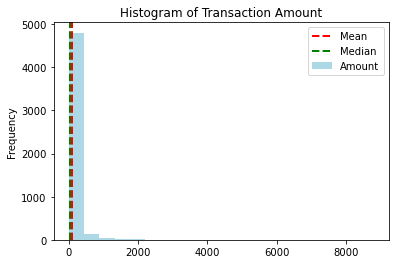

In [8]:
df['Amount'].plot.hist(title='Histogram of Transaction Amount', color='lightblue', bins=20)
plt.axvline(df['Amount'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df['Amount'].median(), color='green', linestyle='dashed', linewidth=2)
plt.legend(['Mean', 'Median', 'Amount'])
plt.show()


Dataset berbentuk skew kanan (positif skew). Mean dan Median berada terpusat di sebelah kiri dataset.

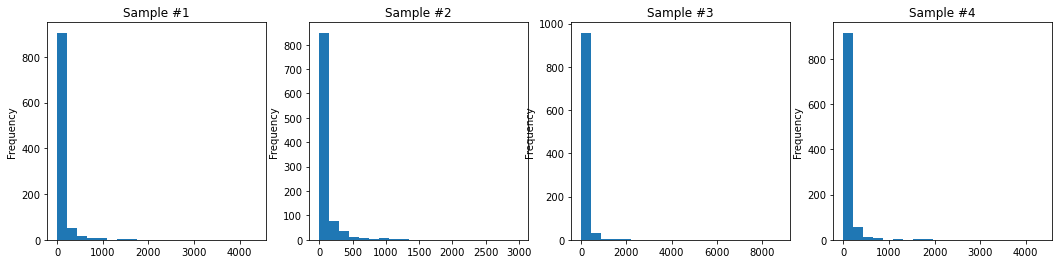

In [9]:
fig,ax = plt.subplots(ncols=4, figsize = (18,4))
for i in range(4):
  df.Amount.sample(1000).plot(kind='hist',bins=20,ax=ax[i])
  ax[i].set_title('Sample #{}'.format(i+1))

Dilakukan resampling dengan banyak sampel = 1000 dan dilakukan sebanyak 4x. Bentuk distribusi dataset terlihat sama.

Extreme value analysis

IQR = 75% - 25% = 79.95 - 5.98 = 73.97

Upper boundary outlier = 75% + (IQR * 1.5) = 79.95 + 110.955 = 190.905

Lower boundary outlier = 25% - (IQR * 1.5) = 5.98 - 110.955 = -104.975

In [10]:
outlier = df[(df['Amount'] > 190.905) | (df['Amount'] < -104.975)]
outlier.shape

(540, 1)

Terdapat 540 outlier dari total 5000 data.

Membuang outlier pada dataset

In [11]:
df_new = df[(df['Amount'] < 190.905) & (df['Amount'] > -104.975)]

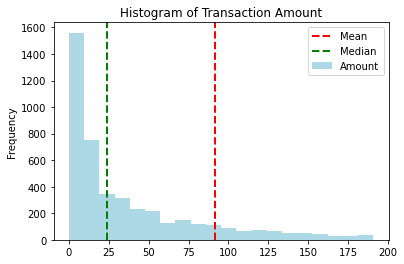

In [12]:
df_new['Amount'].plot.hist(title='Histogram of Transaction Amount', color='lightblue', bins=20)
plt.axvline(df['Amount'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df['Amount'].median(), color='green', linestyle='dashed', linewidth=2)
plt.legend(['Mean', 'Median', 'Amount'])
plt.show()

In [13]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,4460.0,36.602711,43.548981,0.0,4.49,17.62,52.5875,190.8


Dataset baru tanpa outlier sudah memiliki bentuk grafik yang lebih baik. Distribusi masih skew kanan. Mean sudah tidak terpusat di sebelah kiri.

Mean dataset lama (populasi) = 91.791

Mean dataset baru (sampel) = 36.602

Apakah mean sampel berbeda signifikan dengan mean populasi?

Hipotesis testing t-test 1 sampel 2 tail:
* H0 : $\mu$ sampel = 91.791
* H1 : $\mu$ sampel != 91.791

In [14]:
t_stat, p_value = stats.ttest_1samp(df_new['Amount'], 91.791)
print('P-value: ', p_value)
print('T-statistics: ', t_stat)

P-value:  0.0
T-statistics:  -84.63234222509986


C:\Users\Naufal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


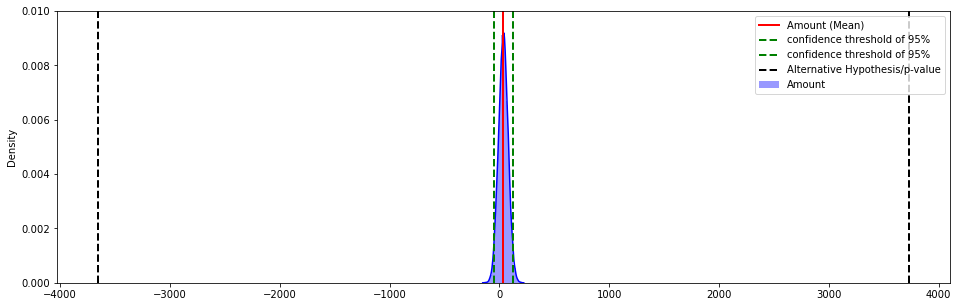

In [15]:
pop = np.random.normal(df_new['Amount'].mean(), df_new['Amount'].std(), 10000)

# confidence interval with critical value 0.05
ci = stats.norm.interval(0.95, df_new['Amount'].mean(), df_new['Amount'].std())

plt.figure(figsize=(16,5))
# memvisualisasikan simulasi pdf
sns.distplot(pop, label='Amount', color='blue')
plt.axvline(df_new['Amount'].mean(), color='red', linewidth=2, label='Amount (Mean)')

# membuat garis confidence interval
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# membuat garis p-value/alternative hypotesis
plt.axvline(pop.mean() + t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis/p-value')
plt.axvline(pop.mean() - t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

P-value < 0.05 

garis alternative hypothesis juga berada di luar garis hijau.

maka H0 ditolak -> $\mu$ sampel != 91.791

## Conclusion

* 1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu! 

jawaban: mean = 91.791, median = 23.62, modus = 1. Data sangat terpusat di sebelah kiri.

* 2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu! 

Jawaban: terlihat bahwa ekor data lebih panjang di kanan. Dataset berbentuk skew kanan.

* 3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data! 

Jawaban: setelah menghitung IQR, outlier ditentukan dengan 75% + (IQR * 1.5) dan 25% - (IQR * 1.5). Kemudian outlier tersebut dihapus karena jumlahnya hanya 10.8% dari total 5000 data.

* 4. Ada berapa banyak data yang merupakan outlier? apakah cukup signifikan jumlahnya? (anggap bahwa jumlah signifikan lebih dari 50%). Jelaskan jawabanmu! 

Jawaban: terdapat 540 outlier dari total 5000 data, atau sebanyak 10.8% dari 5000 data. Maka dapat dikatakan jumlahnya tidak signifikan.

* 5. Setelah kamu menyingkirkan outlier dari data dan melakukan uji hipotesis, apakah ada perbedaan yang signifikan? jelaskan jawabanmu! 

Jawaban: setelah melakukan uji hipotesis t-test 1 sampel 2 tail, didapat p-value < 0.05. Dataset baru dengan tanpa outlier (sampel) memiliki mean yang tidak sama dengan mean data lama (populasi).

## Kesimpulan untuk tim marketing:

Dugaan adanya keanehan pada data transaksi adalah benar. Terbukti bahwa setelah menghilangkan data-data yang aneh, dataset menjadi lebih jelas bentuk dan distribusinya.